In [29]:
from pydicom import dcmread
import numpy as np
import pandas as pd
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [22]:
def read_xray(path, voi_lut = True, fix_monochrome = True):
    dicom = dcmread(path)
    
    # VOI LUT (if available by DICOM device) is used to transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
               
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
        
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
        
    return data


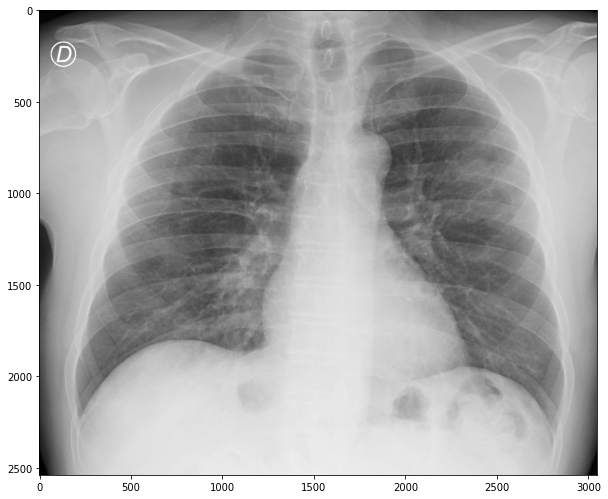

In [27]:
img = read_xray("dataset/train/0a1a3dd9e738/79de130ea278/64a776818efe.dcm")
plt.figure(figsize=(10,10))
plt.imshow(img, 'gray')

In [32]:
a = 0
for root, dirs, filenames in tqdm(os.walk("/workspace/dataset/train")):
    for file in filenames:
        a += 1

print(a)

12386it [00:01, 8571.17it/s]6334

